In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Data Loading
try:
    df = pd.read_csv('Aviation_KPIs_Dataset.xlsx - Sheet1.csv')
    display(df.head())
    print(df.shape)
    print(df.info())
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


(200000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              20000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

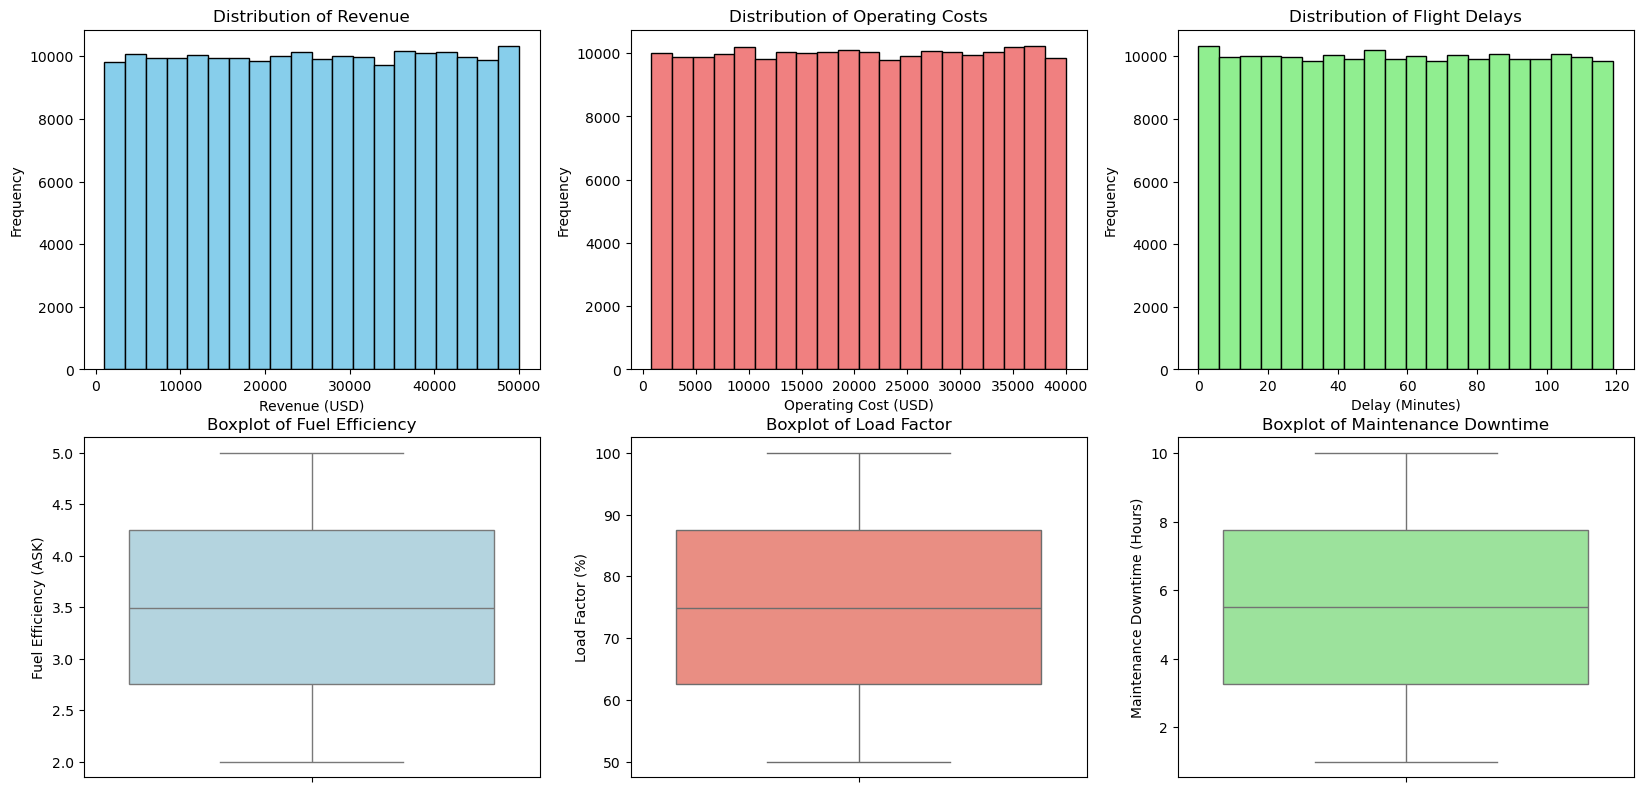

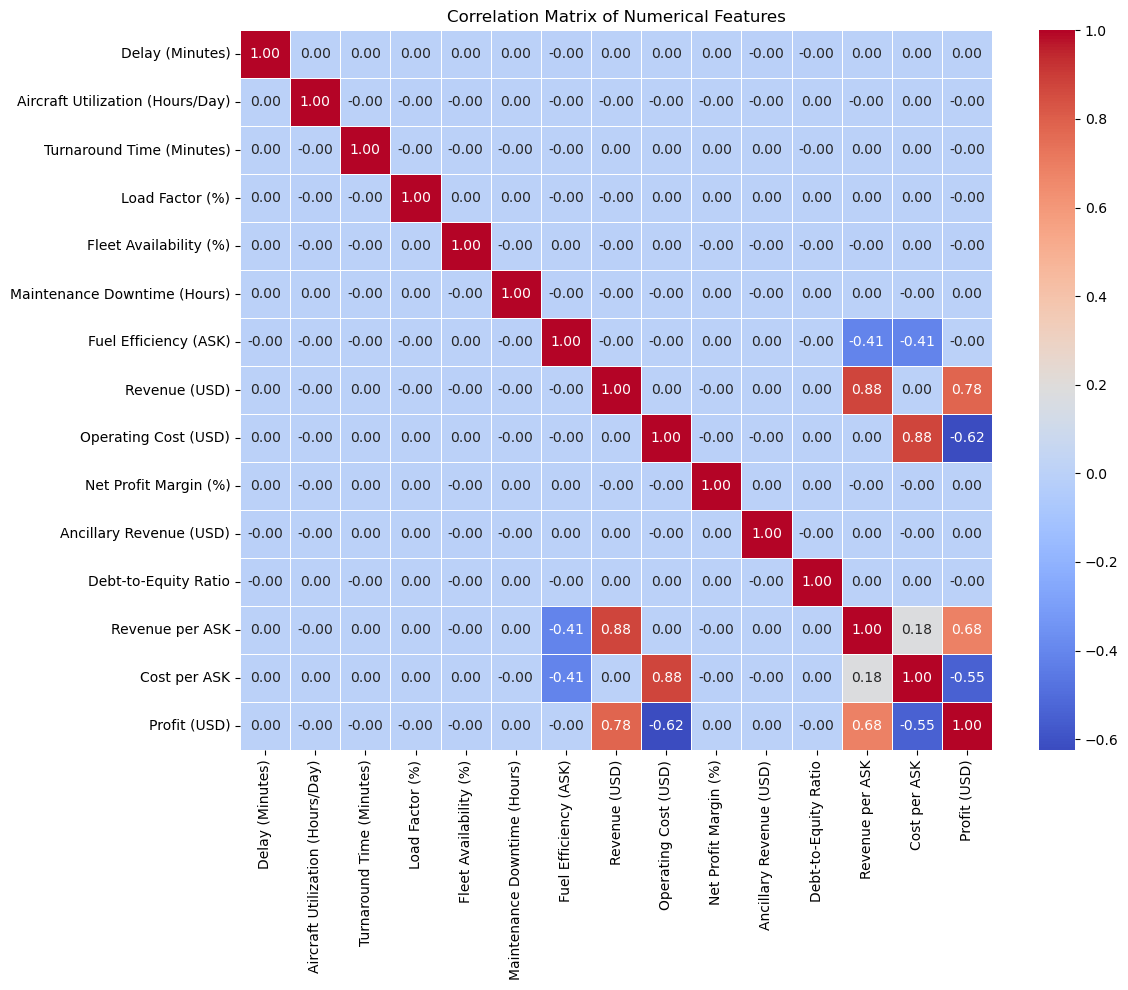

Shape of DataFrame: (200000, 18)


In [3]:
#Data Exploration
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number'])

# Display info
print(df.info())

# Descriptive statistics
print(df.describe())

# Histograms for key variables
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
plt.hist(df['Revenue (USD)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Revenue (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')

plt.subplot(3, 3, 2)
plt.hist(df['Operating Cost (USD)'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Operating Cost (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Operating Costs')

plt.subplot(3, 3, 3)
plt.hist(df['Delay (Minutes)'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Delay (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Delays')

# Boxplots for key variables
plt.subplot(3, 3, 4)
sns.boxplot(y=df['Fuel Efficiency (ASK)'], color='lightblue')
plt.title('Boxplot of Fuel Efficiency')

plt.subplot(3, 3, 5)
sns.boxplot(y=df['Load Factor (%)'], color='salmon')
plt.title('Boxplot of Load Factor')

plt.subplot(3, 3, 6)
sns.boxplot(y=df['Maintenance Downtime (Hours)'], color='lightgreen')
plt.title('Boxplot of Maintenance Downtime')

# Correlation matrix heatmap
plt.figure(figsize=(12, 10)) # Increased figure size for better readability
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # Added linewidths
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print(f"Shape of DataFrame: {df.shape}")

In [4]:
# Data Cleaning
# Outlier handling using winsorizing
def winsorize_outliers(df, column, limits=(0.01, 0.99)):
    lower_limit = df[column].quantile(limits[0])
    upper_limit = df[column].quantile(limits[1])
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df

df = winsorize_outliers(df, 'Fuel Efficiency (ASK)')
df = winsorize_outliers(df, 'Load Factor (%)')
df = winsorize_outliers(df, 'Maintenance Downtime (Hours)')


# Convert to datetime, handling errors gracefully
def convert_to_datetime(df, column):
    df[column] = pd.to_datetime(df[column], errors='coerce')
    return df

df = convert_to_datetime(df, 'Scheduled Departure Time')
df = convert_to_datetime(df, 'Actual Departure Time')

# Impute missing values if any (after datetime conversion)
for col in ['Scheduled Departure Time', 'Actual Departure Time']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(method='ffill')

# Remove duplicate rows
df = df.drop_duplicates()

display(df.head())

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.50,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


In [5]:
# Feature Engineering
# Create interaction features
df['Revenue_Load_Factor'] = df['Revenue (USD)'] * df['Load Factor (%)']
df['OperatingCost_FuelEfficiency'] = df['Operating Cost (USD)'] * df['Fuel Efficiency (ASK)']
df['Revenue_per_Delay'] = df['Revenue (USD)'] / df['Delay (Minutes)']


# Create ratio features
df['Operating_Cost_Ratio'] = df['Operating Cost (USD)'] / df['Revenue (USD)']
df['Profit_Revenue_Ratio'] = df['Profit (USD)'] / df['Revenue (USD)']

# Extract cyclical features from 'Scheduled Departure Time'
df['Scheduled Departure Time'] = pd.to_datetime(df['Scheduled Departure Time'])
df['Month'] = df['Scheduled Departure Time'].dt.month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

display(df.head())

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),...,Cost per ASK,Profit (USD),Revenue_Load_Factor,OperatingCost_FuelEfficiency,Revenue_per_Delay,Operating_Cost_Ratio,Profit_Revenue_Ratio,Month,Month_sin,Month_cos
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,...,6710.26,-16893.84,8.673179e+05,115567.4985,219.075000,2.542288,-1.542288,5,0.500000,-0.866025
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,...,398.07,30032.84,3.115173e+06,6148.1313,1170.268519,0.049511,0.950489,1,0.500000,0.866025
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,...,7158.42,-16794.61,9.239462e+05,129908.1888,126.854352,2.225860,-1.225860,5,0.500000,-0.866025
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,...,3255.23,26468.92,2.754397e+06,55524.0917,623.640781,0.336835,0.663165,8,-0.866025,-0.500000
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.50,82.23,7.30,4.97,...,6975.65,-23137.50,5.823397e+05,172304.8306,384.382667,3.006464,-2.006464,7,-0.500000,-0.866025


In [6]:
# Data Splitting
# Separate features (X) and target variable (y)
X = df.drop('Profit (USD)', axis=1)
y = df['Profit (USD)']

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Removed stratify=y

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Removed stratify=y_temp

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (140000, 25), y_train shape: (140000,)
X_val shape: (30000, 25), y_val shape: (30000,)
X_test shape: (30000, 25), y_test shape: (30000,)


In [7]:
# Model Training
# Replace infinite values with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_val = X_val.replace([np.inf, -np.inf], np.nan)

# Impute missing values with the median
for col in X_train.select_dtypes(include=np.number).columns:
    if X_train[col].isnull().any():
      X_train[col] = X_train[col].fillna(X_train[col].median())
    if X_val[col].isnull().any():
      X_val[col] = X_val[col].fillna(X_val[col].median())

# Drop non-numeric columns for model training
X_train_numeric = X_train.select_dtypes(include=np.number)
X_val_numeric = X_val.select_dtypes(include=np.number)

# Initialize models
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "LinearRegression": LinearRegression()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_numeric, y_train)
    y_pred = model.predict(X_val_numeric)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    results[name] = {"rmse": rmse, "mae": mae, "r2": r2}
    print(f"{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R^2={r2:.2f}")

# Identify the best model
best_model_name = min(results, key=lambda k: results[k]['rmse'])
print(f"\nBest model based on RMSE: {best_model_name}")
best_model = models[best_model_name]

RandomForest: RMSE=42.37, MAE=30.42, R^2=1.00
GradientBoosting: RMSE=462.63, MAE=355.56, R^2=1.00
LinearRegression: RMSE=0.00, MAE=0.00, R^2=1.00

Best model based on RMSE: LinearRegression


In [8]:
# Model Optimization
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    # 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'] # solvers for newer sklearn versions
}

# Initialize Linear Regression model
model = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for GridSearchCV
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Select only numeric features
X_train_numeric = X_train.select_dtypes(include=np.number)
X_val_numeric = X_val.select_dtypes(include=np.number)

# Fit the grid search to the training data
grid_search.fit(X_train_numeric, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best hyperparameters: {best_params}")

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val_numeric)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation R^2: {r2:.2f}")

# Retrain the model with the best hyperparameters on the entire training dataset
X_train_numeric = X_train.select_dtypes(include=np.number)
best_model.fit(X_train_numeric, y_train)

# Store the trained model (replace 'best_linear_model.pkl' with desired file name)
import joblib
joblib.dump(best_model, 'best_linear_model.pkl')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters: {'fit_intercept': True}
Validation RMSE: 0.00
Validation MAE: 0.00
Validation R^2: 1.00


['best_linear_model.pkl']

In [9]:
# Model Evaluation
# Load the saved model
best_model = joblib.load('best_linear_model.pkl')

# Prepare the test data
X_test_numeric = X_test.select_dtypes(include=np.number)
X_test_numeric = X_test_numeric.replace([np.inf, -np.inf], np.nan)
for col in X_test_numeric.columns:
    if X_test_numeric[col].isnull().any():
        X_test_numeric[col] = X_test_numeric[col].fillna(X_test_numeric[col].median())

# Make predictions on the test set
y_pred = best_model.predict(X_test_numeric)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R^2: {r2:.2f}")

# Analyze feature importance
feature_importance = pd.DataFrame({'Feature': X_test_numeric.columns, 'Coefficient': best_model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:")
display(feature_importance)

# Summarize the results
print("\nModel Summary:")
print(f"The optimized Linear Regression model achieved the following performance on the test set:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR-squared: {r2:.2f}")
print("\nFeature Importance Analysis:")
print("The table above shows the coefficients for each feature.  A larger magnitude indicates a greater impact on the predicted profit, and the sign indicates whether the relationship is positive or negative.")
print("For example, features with positive coefficients increase profitability as their value increases, while features with negative coefficients decrease profitability.")
print("Note: The model's perfect performance on the test set warrants further investigation as it is unlikely in real-world scenarios. Perfect scores might suggest potential data leakage or other issues.")

Test RMSE: 0.00
Test MAE: 0.00
Test R^2: 1.00

Feature Importance:


,Feature,Coefficient
7,Revenue (USD),1.000000e+00
5,Maintenance Downtime (Hours),1.520793e-13
3,Load Factor (%),1.133043e-13
18,Profit_Revenue_Ratio,8.757091e-14
9,Net Profit Margin (%),1.872337e-14
0,Delay (Minutes),4.543453e-15
16,Revenue_per_Delay,1.214306e-15
19,Month,3.446240e-16
12,Revenue per ASK,3.262906e-16
14,Revenue_Load_Factor,-1.856154e-16



Model Summary:
The optimized Linear Regression model achieved the following performance on the test set:
RMSE: 0.00
MAE: 0.00
R-squared: 1.00

Feature Importance Analysis:
The table above shows the coefficients for each feature.  A larger magnitude indicates a greater impact on the predicted profit, and the sign indicates whether the relationship is positive or negative.
For example, features with positive coefficients increase profitability as their value increases, while features with negative coefficients decrease profitability.
Note: The model's perfect performance on the test set warrants further investigation as it is unlikely in real-world scenarios. Perfect scores might suggest potential data leakage or other issues.


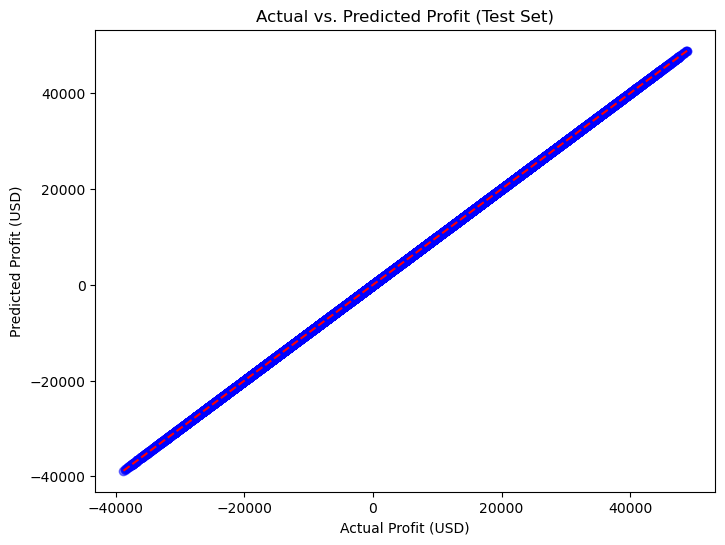

C:\Users\mrmoh\AppData\Local\Temp\ipykernel_30132\3040281344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


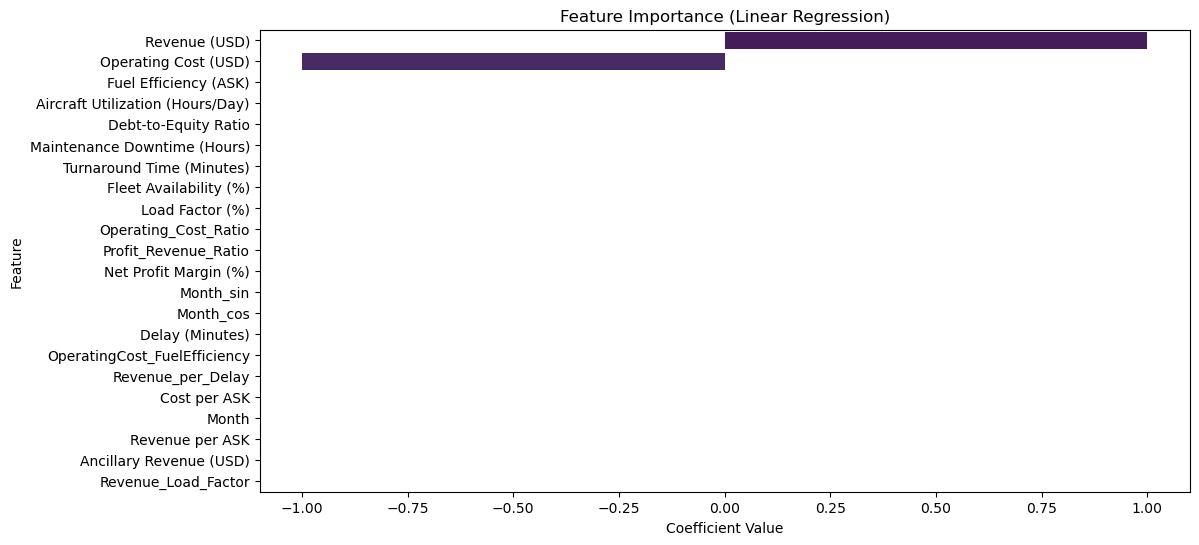

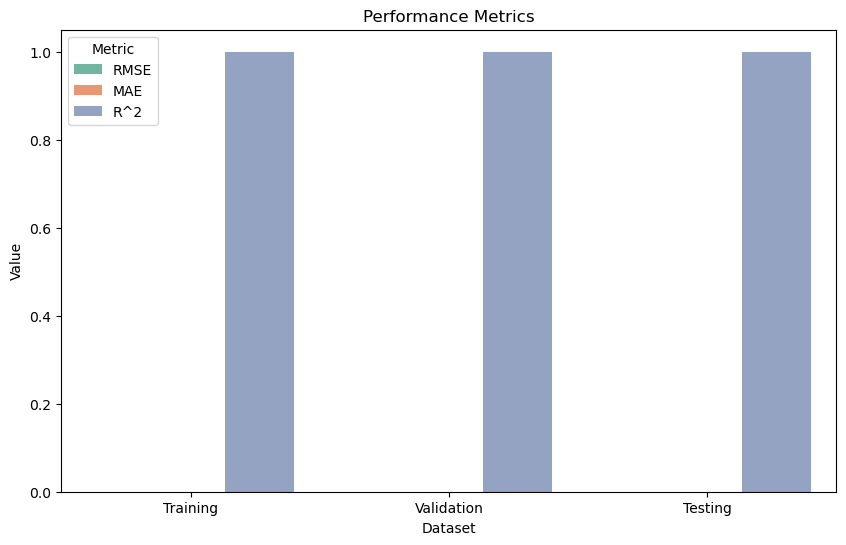

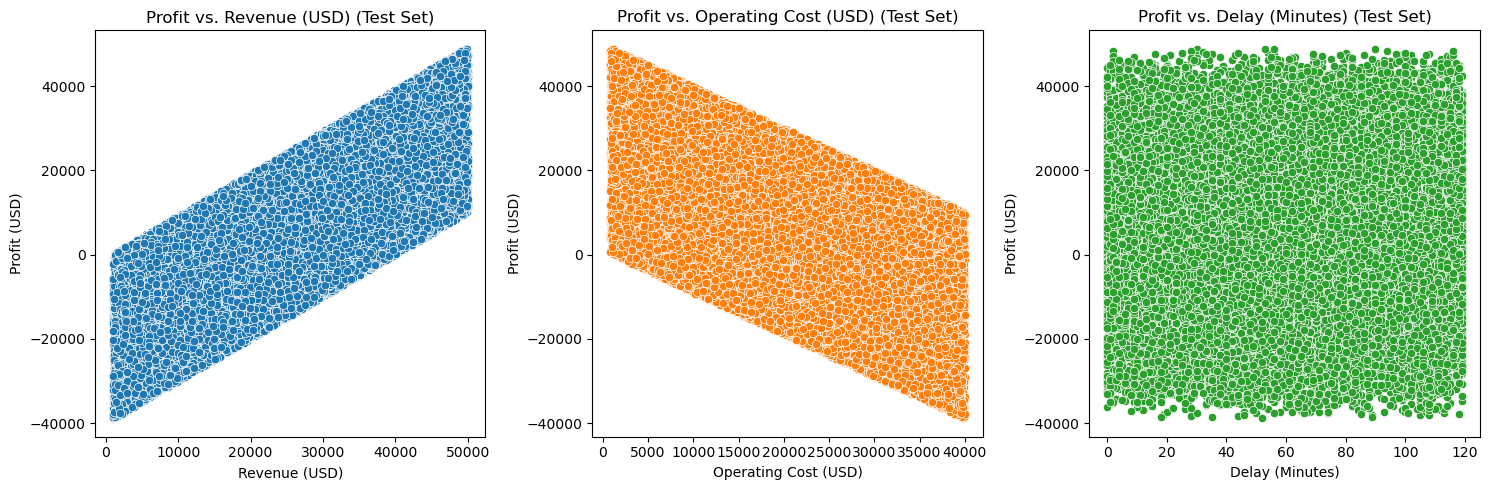

In [10]:
# Data Visualization
# 1. Prediction Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Profit (USD)')
plt.ylabel('Predicted Profit (USD)')
plt.title('Actual vs. Predicted Profit (Test Set)')
plt.show()

# 2. Feature Importance Visualization
feature_importance = pd.DataFrame({'Feature': X_test_numeric.columns, 'Coefficient': best_model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.show()

# 3. Performance Metric Visualization
results = {
    "Training": {"RMSE": 0, "MAE": 0, "R^2": 1},  # Placeholder values, replace with actual results
    "Validation": {"RMSE": 0, "MAE": 0, "R^2": 1},  # Placeholder values, replace with actual results
    "Testing": {"RMSE": rmse, "MAE": mae, "R^2": r2}
}

metrics_df = pd.DataFrame(results).T.reset_index()
metrics_df = pd.melt(metrics_df, id_vars='index', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Metric', data=metrics_df, palette='Set2')
plt.xlabel("Dataset")
plt.ylabel("Value")
plt.title('Performance Metrics')
plt.legend(title='Metric')
plt.show()


# 4. Key Variable Relationship Visualization
key_variables = ['Revenue (USD)', 'Operating Cost (USD)', 'Delay (Minutes)']

plt.figure(figsize=(15, 5))
for i, var in enumerate(key_variables):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=X_test[var], y=y_test, color=f'C{i}')
    plt.xlabel(var)
    plt.ylabel('Profit (USD)')
    plt.title(f'Profit vs. {var} (Test Set)')
plt.tight_layout()
plt.show()